In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [4]:
# Path to TSV: first column = CDS count, second column = accession/file name
path = "../results_cmv/cds_count_per_accession.tsv"

# Read file (no header)
df = pd.read_csv(path, sep='\t', header=None, names=['cds_count', 'accession'])

# Data vector
data = df['cds_count']

# --- Determine bin edges ---
# Start with an automatic rule (Freedman–Diaconis / Sturges hybrid)
bin_edges = np.histogram_bin_edges(data, bins='auto')

# If the automatic rule produces too many bins, cap at 30
max_bins = 30
if len(bin_edges) - 1 > max_bins:
    bin_edges = np.linspace(data.min(), data.max(), max_bins + 1)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(data, bins=bin_edges)

ax.set_title("Distribution of CDS Counts per NCBI Assembly for CMV")
ax.set_xlabel("Number of CDS")
ax.set_ylabel("Number of NCBI assemblies")

# Force integer tick labels and limit how many are shown
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=15))

ax.grid(axis='y', alpha=0.3)
fig.tight_layout()
fig.savefig("cds_counts_histogram.png", dpi=300)
plt.show()

# Frequency table (counts per distinct CDS number)
freq = data.value_counts().sort_index()
display(freq.to_frame(name="n_genomes"))

# (Optional) Percentages
display((freq / freq.sum() * 100).round(2).to_frame(name="percent"))

FileNotFoundError: [Errno 2] No such file or directory: '../results_cmv/cds_count_per_accession.tsv'

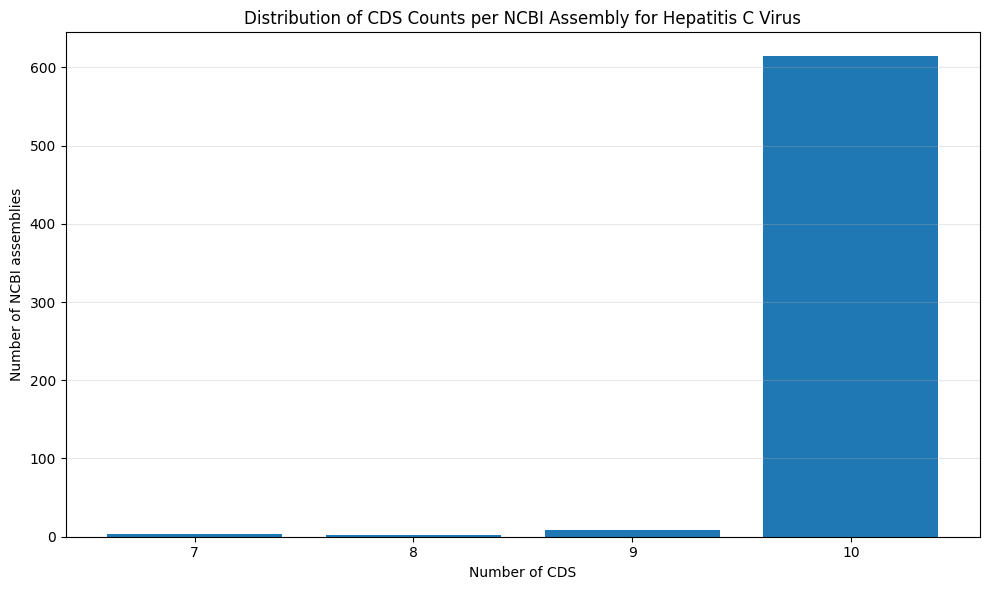

,n_genomes
cds_count,
7,3
8,2
9,8
10,614


,percent
cds_count,
7,0.48
8,0.32
9,1.28
10,97.93


In [3]:

# Path to TSV: first column = CDS count, second = accession/file name
path = "../results_hepc/cds_count_per_accession.tsv"
df = pd.read_csv(path, sep='\t', header=None, names=['cds_count', 'accession'])
data = df['cds_count']

UNIQUE_THRESHOLD = 10   # hasta este número de valores únicos mostramos todos
MAX_BINS = 30           # tope de bins cuando hay muchos valores

unique_counts = np.sort(data.unique())
n_unique = len(unique_counts)

fig, ax = plt.subplots(figsize=(10, 6))

if n_unique <= UNIQUE_THRESHOLD:
    # Mostrar cada valor único como una barra
    freq = data.value_counts().sort_index()
    ax.bar(freq.index, freq.values)
    ax.set_xlabel("Number of CDS")
    ax.set_ylabel("Number of NCBI assemblies")
    ax.set_title("Distribution of CDS Counts per NCBI Assembly for Hepatitis C Virus")
    ax.set_xticks(freq.index)
else:
    # Histograma con selección automática y límite
    bin_edges = np.histogram_bin_edges(data, bins='auto')
    if len(bin_edges) - 1 > MAX_BINS:
        bin_edges = np.linspace(data.min(), data.max(), MAX_BINS + 1)
    ax.hist(data, bins=bin_edges)
    ax.set_xlabel("Number of CDS")
    ax.set_ylabel("Number of NCBI assemblies")
    ax.set_title("Distribution of CDS Counts per NCBI Assembly for Hepatitis C Virus")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=15))

ax.grid(axis='y', alpha=0.3)
fig.tight_layout()
fig.savefig("cds_counts_distribution.png", dpi=300)
plt.show()

# Tabla de frecuencias (si la quieres)
freq_table = data.value_counts().sort_index()
display(freq_table.to_frame(name="n_genomes"))
display((freq_table / freq_table.sum() * 100).round(2).to_frame(name="percent"))
